# __New York Property Sales__

Import Libraries yang dibutuhkan

In [73]:
import math
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset

Baca dataset

In [74]:
df_nyc = pd.read_csv("nyc rolling sales.csv")
df_nyc.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


# Data preprocessing

Memeriksa tipe data dan jumlah data non-null setiap kolom

In [75]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

Mengubah kolom object menjadi category

In [76]:
categorical = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'ZIP CODE', 
               'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE', 'BUILDING CLASS AT PRESENT']

for col in categorical:
    df_nyc[col] = df_nyc[col].astype('category')

Mengubah kolom SALE PRICE, LAND SQUARE FEET, GROSS SQUARE FEET menjadi numerik

In [77]:
floats = ['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']

for col in floats:
    df_nyc[col]=pd.to_numeric(df_nyc[col], errors='coerce')

Mengubah SALE DATE menjadi tipe data datetime

In [78]:
df_nyc['SALE DATE']= pd.to_datetime(df_nyc['SALE DATE'], errors='coerce')

Memeriksa kembali tipe data yang telah diubah

In [79]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      84548 non-null  int64         
 1   BOROUGH                         84548 non-null  category      
 2   NEIGHBORHOOD                    84548 non-null  category      
 3   BUILDING CLASS CATEGORY         84548 non-null  category      
 4   TAX CLASS AT PRESENT            84548 non-null  category      
 5   BLOCK                           84548 non-null  int64         
 6   LOT                             84548 non-null  int64         
 7   EASE-MENT                       84548 non-null  object        
 8   BUILDING CLASS AT PRESENT       84548 non-null  category      
 9   ADDRESS                         84548 non-null  object        
 10  APARTMENT NUMBER                84548 non-null  object        
 11  ZI

Menghapus kolom yang tidak diperlukan

In [80]:
df_nyc.drop(columns = ['Unnamed: 0', 'EASE-MENT', 'APARTMENT NUMBER', 'ADDRESS'], inplace=True)

Menghitung missing value pada tiap kolom

In [81]:
df_nyc.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

Mengidentifikasi kolom yang masih memiliki missing value dan mengetahui presentase missing value pada tiap kolom

In [82]:
df_nyc.replace(' ', np.nan, inplace=True)
df_nyc.isnull().sum() /len(df_nyc) *100

BOROUGH                            0.000000
NEIGHBORHOOD                       0.000000
BUILDING CLASS CATEGORY            0.000000
TAX CLASS AT PRESENT               0.872877
BLOCK                              0.000000
LOT                                0.000000
BUILDING CLASS AT PRESENT          0.872877
ZIP CODE                           0.000000
RESIDENTIAL UNITS                  0.000000
COMMERCIAL UNITS                   0.000000
TOTAL UNITS                        0.000000
LAND SQUARE FEET                  31.049818
GROSS SQUARE FEET                 32.658372
YEAR BUILT                         0.000000
TAX CLASS AT TIME OF SALE          0.000000
BUILDING CLASS AT TIME OF SALE     0.000000
SALE PRICE                        17.222170
SALE DATE                          0.000000
dtype: float64

Mengganti missing value pada kolom TAX CLASS AT PRESENT dan BUILDING CLASS AT PRESENT dengan nilai modusnya

In [83]:
category_col = ['TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT']
for cat in category_col:
    df_nyc[cat].fillna(df_nyc[cat].mode()[0], inplace=True)

Mengganti missing value pada kolom numerik dengan nilai mediannya

In [84]:
float_col = ['LAND SQUARE FEET', 'GROSS SQUARE FEET']
for flo in float_col:
    df_nyc[flo].fillna(df_nyc[flo].median(), inplace=True)

Membuang semua sisa missing value

In [85]:
df_nyc.dropna(inplace=True)

Memeriksa jumlah data yang duplikat

In [86]:
sum(df_nyc.duplicated())

469

Membuang data yang duplikat

In [87]:
df_nyc.drop_duplicates(subset=df_nyc.columns, keep='first', inplace=True)

Memeriksa kembali jumlah data non-null dan tipe data setiap kolom

In [88]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69518 entries, 0 to 84547
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         69518 non-null  category      
 1   NEIGHBORHOOD                    69518 non-null  category      
 2   BUILDING CLASS CATEGORY         69518 non-null  category      
 3   TAX CLASS AT PRESENT            69518 non-null  category      
 4   BLOCK                           69518 non-null  int64         
 5   LOT                             69518 non-null  int64         
 6   BUILDING CLASS AT PRESENT       69518 non-null  category      
 7   ZIP CODE                        69518 non-null  category      
 8   RESIDENTIAL UNITS               69518 non-null  int64         
 9   COMMERCIAL UNITS                69518 non-null  int64         
 10  TOTAL UNITS                     69518 non-null  int64         
 11  LA

Mengubah kolom BOROUGH dengan nama kategori

In [89]:
df_nyc['BOROUGH'].replace({1:'Manhattan', 2:'Bronx', 3:'Brooklyn', 4:'Queens', 5:'Staten Island'}, inplace=True)

Mengatur kembali index dataframe

In [90]:
df_nyc.index = range(0,len(df_nyc))

In [91]:
df_nyc.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
4,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07


# Measure of Central Tendency

### Mean

In [92]:
print(f"Mean dari SALE PRICE adalah {df_nyc['SALE PRICE'].mean()}")

Mean dari SALE PRICE adalah 1281949.7081475302


### Median

In [93]:
for col in float_col:
    median = df_nyc[col].median()
    print("Median dari " + col + " adalah", median)

Median dari LAND SQUARE FEET adalah 2325.0
Median dari GROSS SQUARE FEET adalah 1680.0


### Modus

In [94]:
for col in category_col:
    modus = df_nyc[col].mode()[0]
    print("Modus dari " + col + " adalah", modus)

Modus dari TAX CLASS AT PRESENT adalah 1
Modus dari BUILDING CLASS AT PRESENT adalah D4


---

# Measure of Spread

### Range

In [95]:
lgs = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']
for col in lgs:
    maximum = df_nyc[col].max()
    minumum = df_nyc[col].min()
    rangelgs = maximum - minumum
    print("Range dari " + col + " adalah", rangelgs)

Range dari LAND SQUARE FEET adalah 4252327.0
Range dari GROSS SQUARE FEET adalah 3750565.0
Range dari SALE PRICE adalah 2210000000.0


### Variance

In [96]:
for col in lgs:
    variance = df_nyc[col].var()
    print("Variance dari " + col + " adalah", variance)

Variance dari LAND SQUARE FEET adalah 1099860342.6057487
Variance dari GROSS SQUARE FEET adalah 579474045.8459406
Variance dari SALE PRICE adalah 130818550284552.52


### Standard Deviasi

In [97]:
for col in lgs:
    stdeviasi = df_nyc[col].std()
    print("Standard Deviasi dari " + col + " adalah", stdeviasi)

Standard Deviasi dari LAND SQUARE FEET adalah 33164.14242228719
Standard Deviasi dari GROSS SQUARE FEET adalah 24072.26715218034
Standard Deviasi dari SALE PRICE adalah 11437593.727902409


---

# Probability Distribution

Normal Distribution

c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Distribusi'), Text(0, 0.5, 'Frequency')]

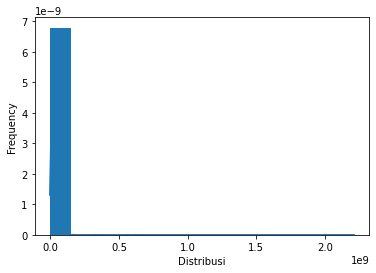

In [98]:
df_sale_price = df_nyc['SALE PRICE']
ax = sns.distplot(df_sale_price,
                 bins=15,
                 kde=True,
                 hist_kws={"linewidth": 15, 'alpha':1})
ax.set(xlabel='Distribusi', ylabel='Frequency')

Dari grafik ini dapat diketahui data SALE PRICE belum berdistribusi normal

---

# Confidence Intervals

In [99]:
sample_means = []
n = 1000
for sample in range(0,3000):
    sample_values = np.random.choice(a=df_sale_price, size=n)
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

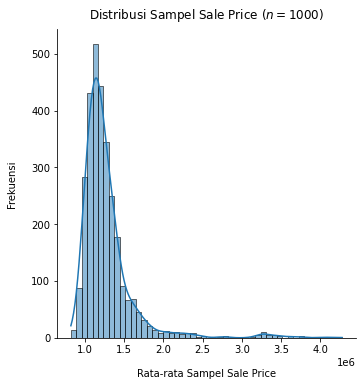

In [100]:
sns.displot(sample_means, kde=True, bins=50)
plt.title("Distribusi Sampel Sale Price ($n=1000$)", y=1.015, fontsize=12)
plt.xlabel("Rata-rata Sampel Sale Price", labelpad=14)
plt.ylabel("Frekuensi", labelpad=14);

Dengan menggunakan Confidence Intervals, data SALE PRICE berdistribusi lebih baik walaupun belum juga berdistribusi normal.

In [101]:
# menghitung median dari sampel
median_sample_means = np.median(sample_means)
median_sample_means

1190645.975

In [102]:
# menghitung rata-rata dari sampel
mean_sample_means = np.mean(sample_means)
mean_sample_means

1276856.9757413333

In [103]:
# menghitung rata-rata dari kolom SALE PRICE
sale_price_mean = df_nyc['SALE PRICE'].mean()
sale_price_mean

1281949.7081475302

In [104]:
# menghitung standar deviasi dari sampel
stdev_sample_means = np.std(sample_means)
stdev_sample_means

355491.8506931156

In [105]:
# menghitung standard error dari kolom SALE PRICE
sale_price_stdev = df_nyc['SALE PRICE'].std()
standard_error = sale_price_stdev/np.sqrt(n)
standard_error

361688.4713182776

Critical Z-Score

In [106]:
tail = 1 - stats.norm.cdf(1.96)
tail

0.024997895148220484

In [107]:
1 - (tail * 2)

0.950004209703559

In [108]:
lower_95_perc_bound = mean_sample_means - 1.96*standard_error
lower_95_perc_bound

567947.5719575093

In [109]:
upper_95_perc_bound = mean_sample_means + 1.96*standard_error
upper_95_perc_bound

1985766.3795251574

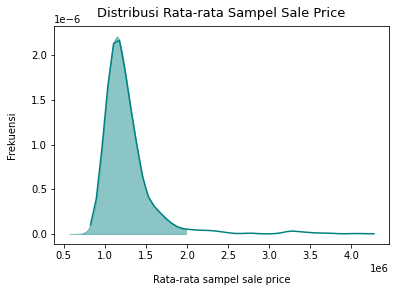

In [110]:
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means))
plt.plot(pos, kde(pos), color='teal')
shade = np.linspace(lower_95_perc_bound, upper_95_perc_bound)
plt.fill_between(shade, kde(shade), alpha=0.45, color='teal',)
plt.title("Distribusi Rata-rata Sampel Sale Price", y=1.015, fontsize=13)
plt.xlabel("Rata-rata sampel sale price", labelpad=14)
plt.ylabel("Frekuensi", labelpad=14);

---

# Hypotesis Testing

__Pertanyaan__ : Apakah rata-rata harga jual bangunan di Manhattan berbeda secara signifikan daripada rata-rata harga jual bangunan di Brooklyn? <br>
<br>
population: Harga jual bangunan di Manhattan dan Brooklyn dari New York Property Sale <br>

Parameter of interest: <br>
μ1 : harga jual bangunan di Brooklyn <br>
μ2 : harga jual bangunan di Manhattan

Null Hypotesis: μ1 = μ2 <br>
Alternative Hypothesis: μ1 ≠ μ2

In [111]:
# ambil data Borough Brooklyn dan Manhattan
brooklyn = df_nyc[df_nyc['BOROUGH'] == 'Brooklyn']
manhattan = df_nyc[df_nyc['BOROUGH'] == 'Manhattan']

In [112]:
n1 = len(brooklyn)
mu1 = brooklyn['SALE PRICE'].mean()
sd1 = brooklyn['SALE PRICE'].std()

(n1,mu1,sd1)

(23808, 842238.7791078629, 3954696.992774047)

In [113]:
n2 = len(manhattan)
mu2 = manhattan['SALE PRICE'].mean()
sd2 = manhattan['SALE PRICE'].std()

(n2,mu2,sd2)

(14342, 3350579.923232464, 24167011.421004914)

In [114]:
sm.stats.ztest(brooklyn['SALE PRICE'], manhattan['SALE PRICE'], alternative='two-sided')

(-15.670552827599447, 2.4047859376584673e-55)

Karena p-value adalah 2.4047859376584673e-55 lebih kecil dari alpha 0.05 maka menolak null hypothesis yang menyatakan bahwa rata-rata harga jual bangunan di Manhattan sama dengan harga jual bangunan di Brooklyn. Jadi, Alternative Hypothesis diterima yaitu rata-rata harga jual bangunan di Manhattan dan Brooklyn berbeda secara signifikan.

# Kesimpulan

Berdasarkan analisis yang telah dilakukan, dapat disimpulkan bahwa:<br>
- Rata-rata dari harga jual bangunan di New York adalah 1281949.7081475302
- Data harga jual bangunan di New York belum berdistribusi normal
- 95% Confidence Interval menyatakan bahwa nilai rata-rata dari harga jual bangunan di New York berada di antara 567947.5719575093 dan 1985766.3795251574
- Rata-rata harga jual bangunan di Manhattan dan Brooklyn berbeda secara signifikan.